# Mall Customer Segmentation 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
 

In [51]:
data=pd.read_csv(r'Mall_Customers.csv',encoding='unicode_escape')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

In [52]:
data.shape
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  200
Number of columns:  5


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

/tmp/ipykernel_57954/2806216143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=data,palette='Set2')


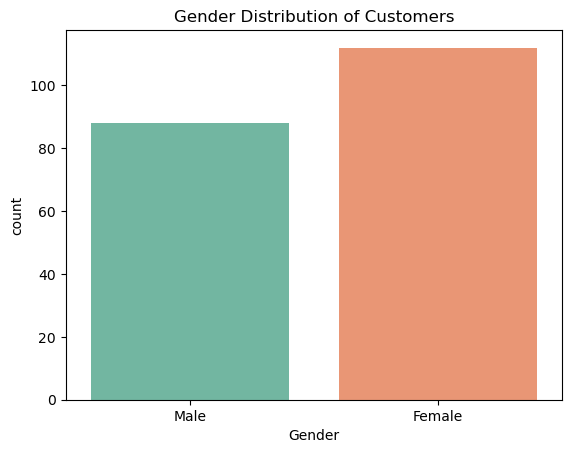

In [56]:
sns.countplot(x='Gender',data=data,palette='Set2')
plt.title('Gender Distribution of Customers')
plt.show()

/tmp/ipykernel_57954/2596065868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Gender", y="Spending Score (1-100)", palette="pastel")


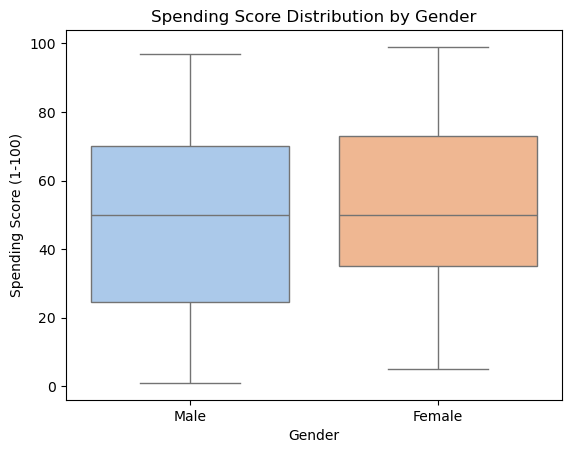

In [57]:
# Spending Score Distributuin by gender
sns.boxplot(data=data, x="Gender", y="Spending Score (1-100)", palette="pastel")
plt.title("Spending Score Distribution by Gender")
plt.show()


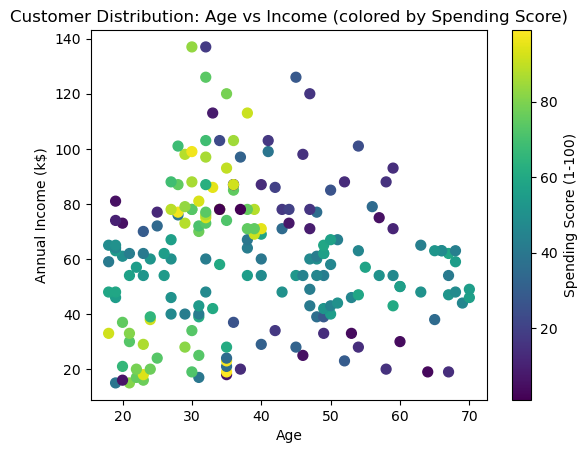

In [58]:
# Customer Distribution: Age vs Income (colored by Spending Score)
plt.scatter(data['Age'],data['Annual Income (k$)'],c=data['Spending Score (1-100)'],cmap='viridis',marker='o',s=50)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Distribution: Age vs Income (colored by Spending Score)')
plt.colorbar(label='Spending Score (1-100)') 
plt.show()

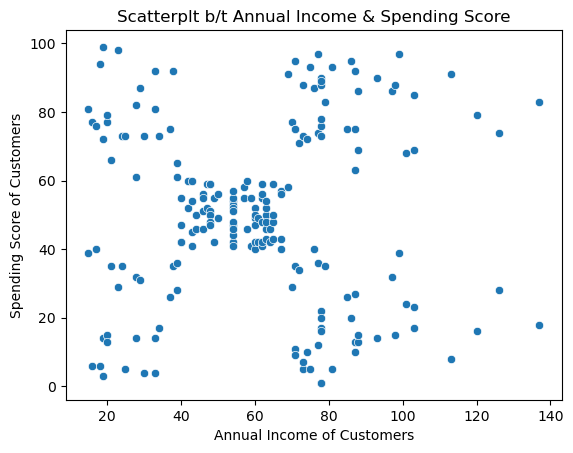

In [59]:
# Scatterplot b/t Annual Income and Spending Score
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.xlabel('Annual Income of Customers')
plt.ylabel("Spending Score of Customers")
plt.title('Scatterplt b/t Annual Income & Spending Score')
plt.show()


/tmp/ipykernel_57954/4179001742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',y='Spending Score (1-100)',data=data,palette='Set2')


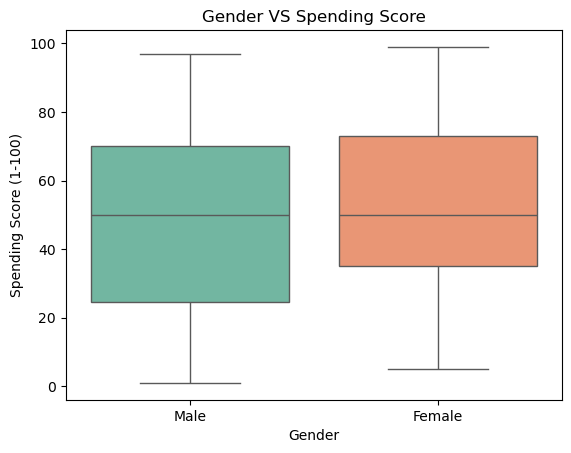

In [60]:
# Gender VS Spending Score
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=data,palette='Set2')
plt.title('Gender VS Spending Score')
plt.show()

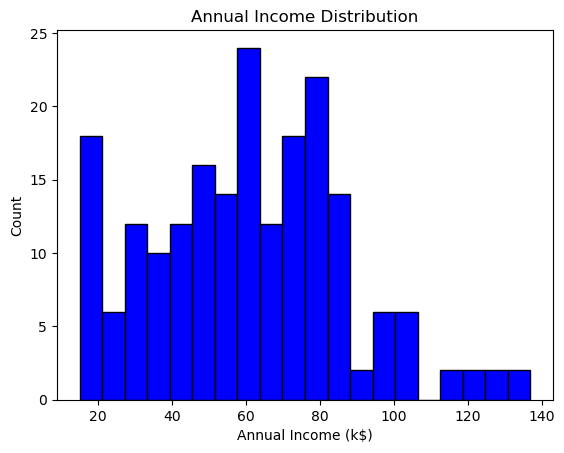

In [61]:
#Annual Income Distribution
plt.hist(data['Annual Income (k$)'],bins=20,color='blue',edgecolor='black')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Annual Income Distribution')
plt.show()

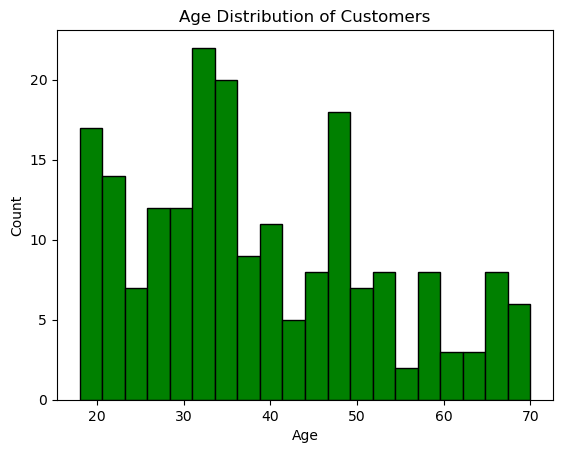

In [62]:
#Age Distribution of Customers
plt.hist(data['Age'],bins=20,color='green',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()

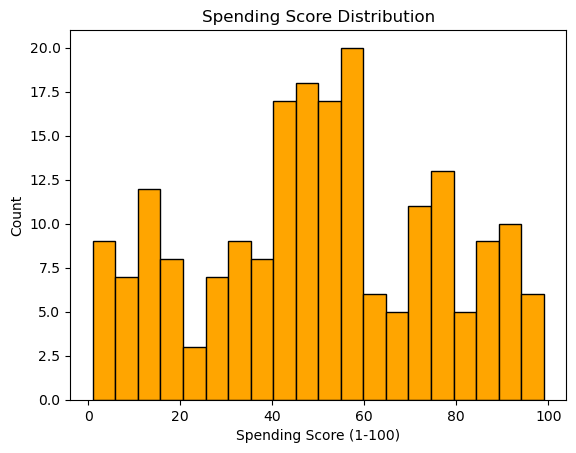

In [63]:
#Spending Score Distribution
plt.hist(data['Spending Score (1-100)'],bins=20,color='Orange',edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Spending Score Distribution')
plt.show()

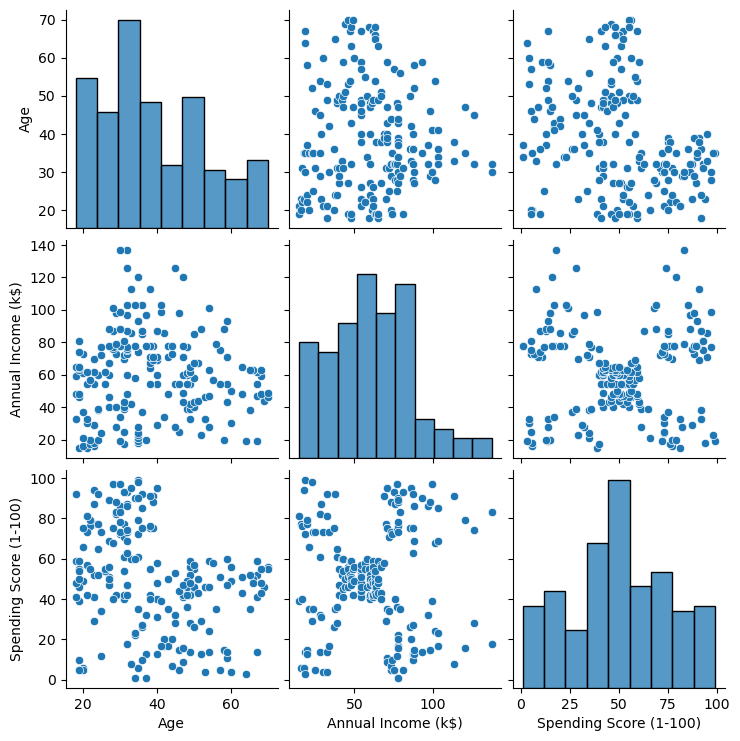

In [64]:
sns.pairplot(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()
 

In [65]:
data=data.drop('CustomerID',axis=1)


In [66]:
gender_encoder=LabelEncoder()
data['Gender']=gender_encoder.fit_transform(data['Gender'])

# Building and Evaluating Model 

In [67]:
data.head(2)
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [68]:
scaler=StandardScaler()
scaler_data=scaler.fit_transform(x)

/tmp/ipykernel_57954/2056918116.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_range,wccs,'bo-',marker='o')


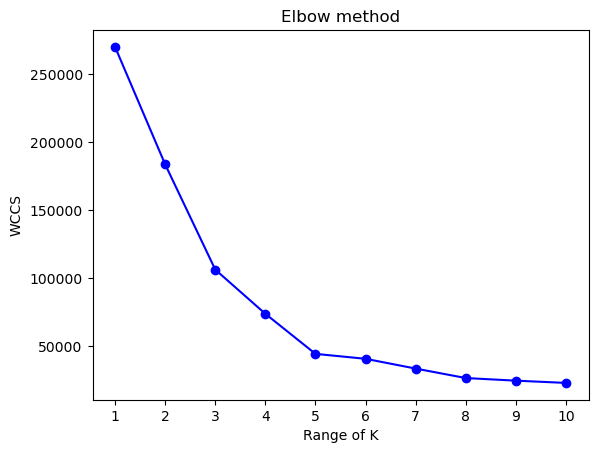

In [69]:
wccs=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x)
    wccs.append(kmeans.inertia_)

plt.plot(k_range,wccs,'bo-',marker='o')
plt.xlabel('Range of K')
plt.ylabel("WCCS")
plt.title('Elbow method')
plt.xticks(np.arange(1,11,1))
plt.show()

In [70]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [71]:
x['Cluster']=y_kmeans

/tmp/ipykernel_57954/3054971807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster']=y_kmeans


In [72]:
x.head(2)


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2


In [73]:
cluster_labels = {
    0: "Moderate Income, Moderate Spenders",
    1: "High Income, high Spenders",
    2: "Medium Income, High Spenders",
    3: "High Income, Low Spenders",
    4: "Low Income, Low Spenders"
}


x['Category'] = x['Cluster'].map(cluster_labels)
x.tail()

,Annual Income (k$),Spending Score (1-100),Cluster,Category
195,120,79,1,"High Income, high Spenders"
196,126,28,3,"High Income, Low Spenders"
197,126,74,1,"High Income, high Spenders"
198,137,18,3,"High Income, Low Spenders"
199,137,83,1,"High Income, high Spenders"


/tmp/ipykernel_57954/820703636.py:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',


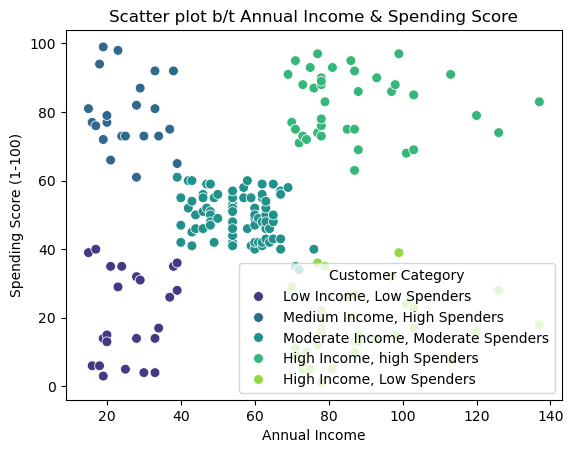

In [74]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',
    data=x,hue='Category',
    style='Category',
    markers='o',palette='viridis',s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot b/t Annual Income & Spending Score')
plt.legend(title='Customer Category')
plt.show()

In [75]:
cluster_profile = x.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)
 
 
  

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


*Conclusion*

The Mall Customer Segmentation project successfully applied unsupervised learning to classify customers into meaningful groups. Among the clustering techniques tested, K-Means provided the clearest and most actionable segmentation.

These insights can be leveraged by marketing teams to:

* Design personalized campaigns for each customer group.

* Improve customer retention by focusing on high-value segments.

* Offer loyalty programs to increase spending among low-spending clusters.

Overall, this project demonstrates the practical use of machine learning for business intelligence and data-driven decision-making in the retail sector.